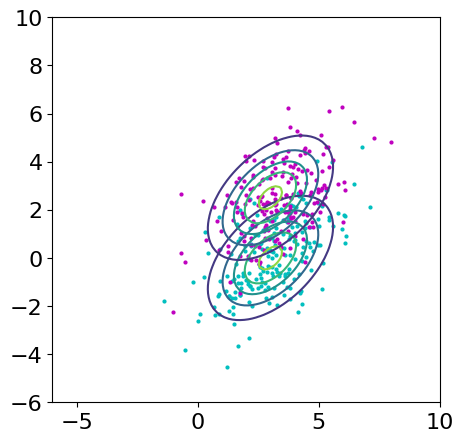

In [96]:
import numpy as np
import matplotlib.pyplot as plt

NumDataPerClass = 200

# means of 2 samples
m1 = [3, 0]
m2 = [3, 2.5]


C = [[2, 1], [1, 2]]

# Cholesky decomposition matrix = A;  this is requires for calculting a dataset.
A = np.linalg.cholesky(C)

# Generate data samples and adjust according to covarient matrix and mean.
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2


# gives the probabilty of x being some values (I.T)
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C) # calculate the inverse of the Covariance metrix.
    dC = np.linalg.det(C)  # get the denominaotor of gaussian destribution formula.
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den



def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij') # create set of values for each combinations.

    Z = np.zeros([nx, ny]) # create array of 100 * 100
    # print("Z", Z)

    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]]) # get the relevent datapoint from the 2 dimentional space. we have to get each of possible combinations (X, Y)
            Z[i, j] = gauss2D(xvec, m, C) # find the PDF for each of values. here we get very small probability values.

    return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-5, 5, nx) # Generate 100 data
  y = np.linspace(-5, 5, ny)


  X, Y = np.meshgrid(x, y, indexing='ij')  # make a meshgrid of x * y
  Z = np.zeros([nx, ny]) # Make a zero array of nx * ny
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec, m1, C1)
      den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
      Z[i,j] = num / den

  return X, Y, Z # returns the data points with, calculated prosterior probability array.

# Scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", label='Class 1', s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="m", label='Class 2', s=4)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

# Contour plot for Class 1
nx, ny = 100, 100
m1 = np.array(m1)
C1 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
ax.contour(Xp, Yp, Zp, 5)

# Contour plot for Class 2
m2 = np.array(m2)
C2 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m2, C2)
ax.contour(Xp, Yp, Zp, 5)

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])


plt.show()

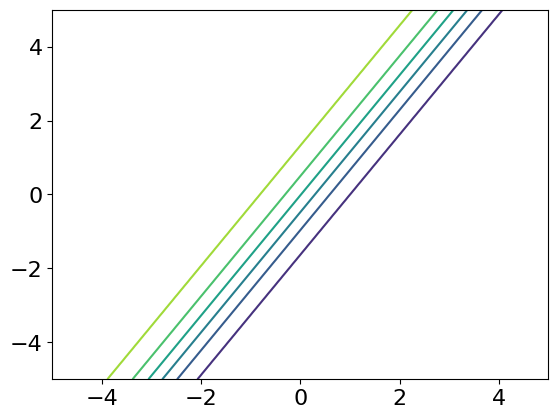

In [97]:
X, Y, Z = posteriorPlot(nx, ny, m1,C1,  m2, C2, 0.5, 0.5)
plt.contour(X, Y, Z)
plt.show()

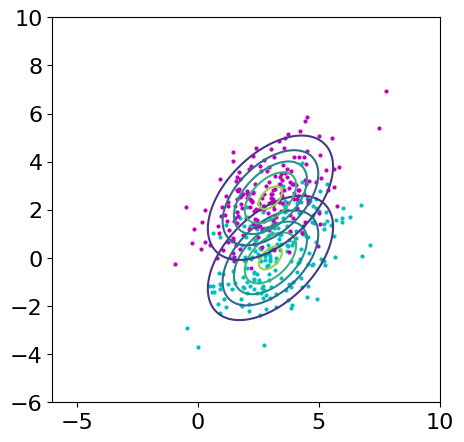

In [98]:
import numpy as np
import matplotlib.pyplot as plt

NumDataPerClass = 200

# means of 2 samples
m1 = [3, 0]
m2 = [3, 2.5]


C = [[2, 1], [1, 2]]

# Cholesky decomposition matrix = A;  this is requires for calculting a dataset.
A = np.linalg.cholesky(C)

# Generate data samples and adjust according to covarient matrix and mean.
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2


# gives the probabilty of x being some values (I.T)
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C) # calculate the inverse of the Covariance metrix.
    dC = np.linalg.det(C)  # get the denominaotor of gaussian destribution formula.
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den



def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij') # create set of values for each combinations.

    Z = np.zeros([nx, ny]) # create array of 100 * 100
    # print("Z", Z)

    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]]) # get the relevent datapoint from the 2 dimentional space. we have to get each of possible combinations (X, Y)
            Z[i, j] = gauss2D(xvec, m, C) # find the PDF for each of values. here we get very small probability values.

    return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-5, 5, nx) # Generate 100 data
  y = np.linspace(-5, 5, ny)


  X, Y = np.meshgrid(x, y, indexing='ij')  # make a meshgrid of x * y
  Z = np.zeros([nx, ny]) # Make a zero array of nx * ny
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec, m1, C1)
      den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
      Z[i,j] = num / den

  return X, Y, Z # returns the data points with, calculated prosterior probability array.

# Scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", label='Class 1', s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="m", label='Class 2', s=4)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

# Contour plot for Class 1
nx, ny = 100, 100
m1 = np.array(m1)
C1 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
ax.contour(Xp, Yp, Zp, 5)

# Contour plot for Class 2
m2 = np.array(m2)
C2 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m2, C2)
ax.contour(Xp, Yp, Zp, 5)

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])


plt.show()

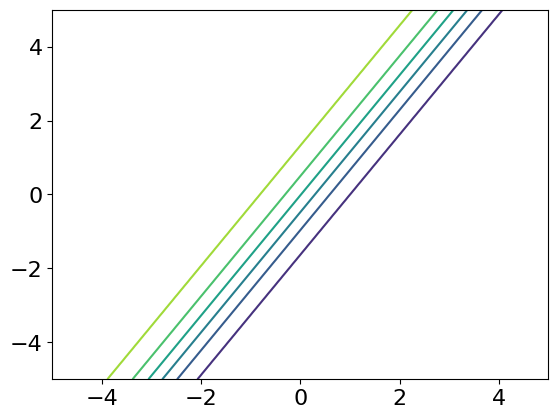

In [100]:
X, Y, Z = posteriorPlot(nx, ny, m1,C1,  m2, C2, 0.7, 0.3)
plt.contour(X, Y, Z)
plt.show()

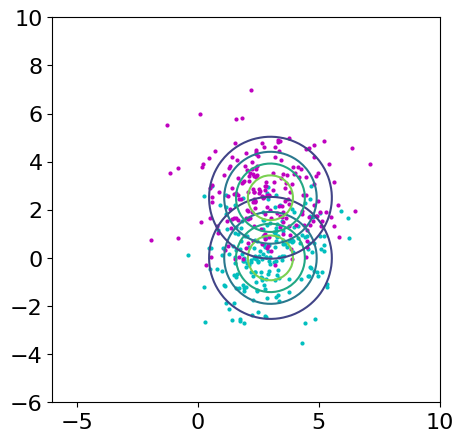

In [101]:
import numpy as np
import matplotlib.pyplot as plt

NumDataPerClass = 200

# means of 2 samples
m1 = [3, 0]
m2 = [3, 2.5]


C = [[2, 0], [0, 2]]

# Cholesky decomposition matrix = A;  this is requires for calculting a dataset.
A = np.linalg.cholesky(C)

# Generate data samples and adjust according to covarient matrix and mean.
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2


# gives the probabilty of x being some values (I.T)
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C) # calculate the inverse of the Covariance metrix.
    dC = np.linalg.det(C)  # get the denominaotor of gaussian destribution formula.
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den



def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij') # create set of values for each combinations.

    Z = np.zeros([nx, ny]) # create array of 100 * 100
    # print("Z", Z)

    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]]) # get the relevent datapoint from the 2 dimentional space. we have to get each of possible combinations (X, Y)
            Z[i, j] = gauss2D(xvec, m, C) # find the PDF for each of values. here we get very small probability values.

    return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-5, 5, nx) # Generate 100 data
  y = np.linspace(-5, 5, ny)


  X, Y = np.meshgrid(x, y, indexing='ij')  # make a meshgrid of x * y
  Z = np.zeros([nx, ny]) # Make a zero array of nx * ny
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec, m1, C1)
      den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
      Z[i,j] = num / den

  return X, Y, Z # returns the data points with, calculated prosterior probability array.

# Scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", label='Class 1', s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="m", label='Class 2', s=4)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

# Contour plot for Class 1
nx, ny = 100, 100
m1 = np.array(m1)
C1 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
ax.contour(Xp, Yp, Zp, 5)

# Contour plot for Class 2
m2 = np.array(m2)
C2 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m2, C2)
ax.contour(Xp, Yp, Zp, 5)

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 0], [0, 2]])
C2 = np.array([[1.5, 0], [0, 1.5]])

plt.show()

Part 2

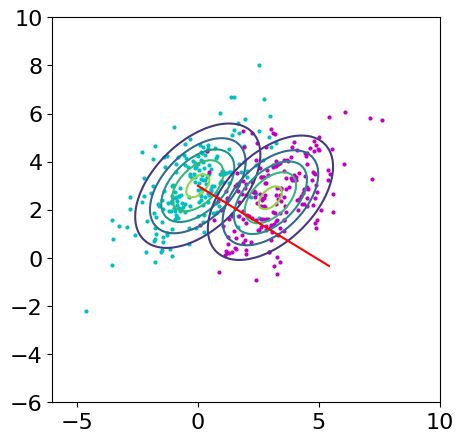

In [103]:
NumDataPerClass = 200

m1 = [0, 3]
m2 = [3, 2.5]

C = [[2, 1], [1, 2]]

A = np.linalg.cholesky(C)

U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-6, 10, nx)
    y = np.linspace(-6, 10, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            Z[i, j] = gauss2D(xvec, m, C)
    return X, Y, Z


# this function generate some data and return prosteir probabilities of all combinations possible.
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  # nx, ny = amount of value combinations supposed to use.  just like x, y.
  x = np.linspace(-5, 5, nx)
  y = np.linspace(-5, 5, ny)

  # create all the combinatons of values mixing, x and y.
  X, Y = np.meshgrid(x, y, indexing='ij')
  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec, m1, C1)
      den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
      Z[i,j] = num / den

  return X, Y, Z


# figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

# Contour plot for Class 1
nx, ny = 100, 100
m1 = np.array(m1)
C1 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
ax.contour(Xp, Yp, Zp, 5)

# Contour plot for Class 2
m2 = np.array(m2)
C2 = np.array(C, np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m2, C2)
ax.contour(Xp, Yp, Zp, 5)

# Scatter plot, used another set of data.

U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2
ax.scatter(X1[:, 0], X1[:, 1], c="c", label='Class 1', s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="m", label='Class 2', s=4)

# Fisher linear transformation.
mean_diff = m2 - m1

C = np.array(C)

Ci = np.linalg.inv(2 * C)

uF = Ci @ mean_diff

scaling_factor = 5

plt.plot([m1[0], m1[0] + scaling_factor * uF[0]], [m1[1], m1[1] + scaling_factor * uF[1]], color='red', label='Linear Transformation Vector')


# for each point we calculate the projection.
yp1 = X1 @ uF
yp2 = X2 @ uF

plt.show()


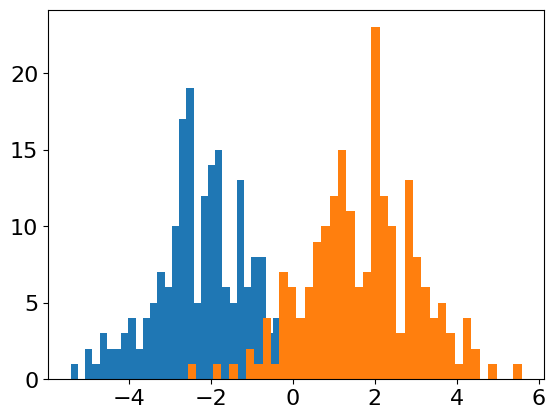

In [104]:
plt.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')


The area under the curve:  9735.25
accuracy_for_class_yp1:  0.87
accuracy_for_class_yp2:  0.96


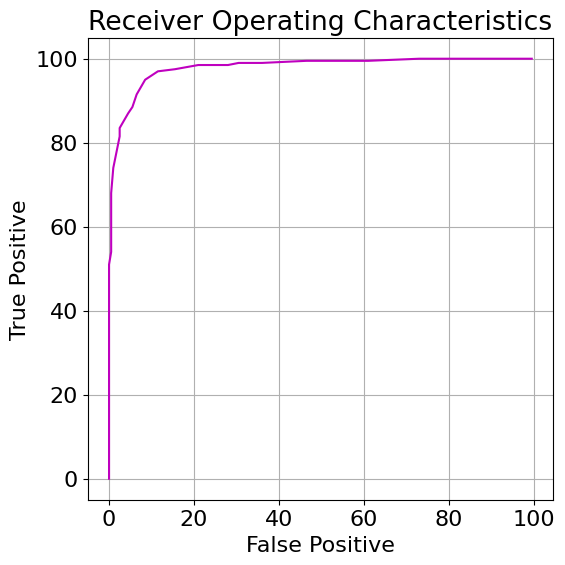

In [106]:
# Define a range over which to slide a threshold.
# we slide the threshold between min and max value picked from both classes.

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))

# Set up an array of thresholds

nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints) # make arry of thresholds, that can go through.

ROC = np.zeros( (nRocPoints, 2) ) # Receiver Operation Characteristic. , 2D array.


# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2) # true possitive percentage. - values in range of positive(yp2) /  values supposed to be in positive range(all vaues in yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1) # false positive percentage.  - values from yp1 in range of positive(yp2) /  values supposed to be in negative range(all vaues in yp1)
  ROC[i,:] = [TP, FP]  # assign true possitive,  false positive percentages to the ROC.

# Plot ROC curve

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

ROC = ROC[ROC[:,0].argsort()]

AUC = np.trapz(ROC[:,0], x=ROC[:,1]) # to give a positive value.
print("The area under the curve: " , AUC)

# The value we choosen - > -1
# YP2 = positive
# YP1 = negative


thresh = 0.2

TP = len(yp2[yp2 > thresh])
FP = len(yp1[yp1 > thresh])

# Accuracy

accuracy_for_class_yp1 =  (TP) / (len(yp1))

accuracy_for_class_yp2 = (len(yp1) - FP) /  len(yp2)

print("accuracy_for_class_yp1: ", accuracy_for_class_yp1)
print("accuracy_for_class_yp2: ", accuracy_for_class_yp2)



**Try for random and mean vectors**

AUC for Random Vector: 8390.625
AUC for Mean Vector: 9653.25


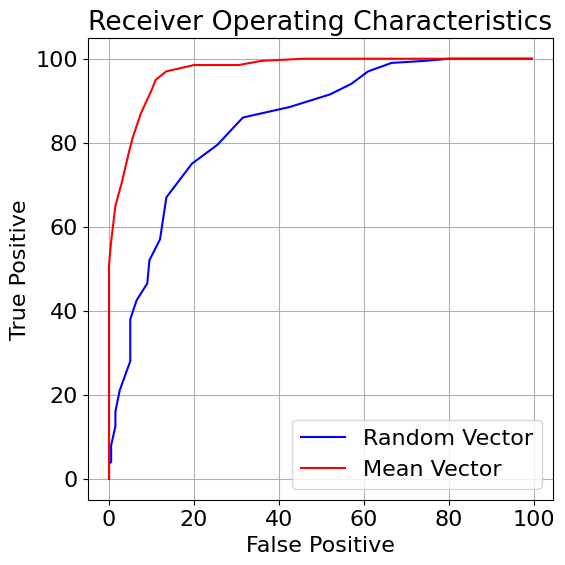

In [107]:
# Generate a random vector with the same shape as mean_diff
random_vector = np.random.rand(*mean_diff.shape)

mean_vector = np.array(m2) - np.array(m1)

scaling_factor = 5

# Plot the vectors
# plt.plot([0, scaling_factor * random_vector[0]], [0, scaling_factor * random_vector[1]], color='blue', label='Random Vector')
# plt.plot([m1[0], m2[0]], [m1[1], m2[1]], color='green', label='Vector from m1 to m2')

# get the projections for the random vector.
yp1_r = X1 @ random_vector
yp2_r = X2 @ random_vector

# get the projections for the mean vector.
yp1_m = X1 @ mean_vector
yp2_m = X2 @ mean_vector


# Define a range over which to slide a threshold for the random vector
pmin_random = np.min(np.array((np.min(yp1_r), np.min(yp2_r))))
pmax_random = np.max(np.array((np.max(yp1_r), np.max(yp2_r))))
nRocPoints = 50
thRange_random = np.linspace(pmin_random, pmax_random, nRocPoints)

# Define a range over which to slide a threshold for the mean vector
pmin_mean = np.min(np.array((np.min(yp1_m), np.min(yp2_m))))
pmax_mean = np.max(np.array((np.max(yp1_m), np.max(yp2_m))))
thRange_mean = np.linspace(pmin_mean, pmax_mean, nRocPoints)

# Set up arrays to store ROC data
ROC_random = np.zeros((nRocPoints, 2))
ROC_mean = np.zeros((nRocPoints, 2))

# Compute True Positives and False Positives for the random vector
for i in range(len(thRange_random)):
    thresh = thRange_random[i]
    TP = len(yp2_r[yp2_r > thresh]) * 100 / len(yp2_r)
    FP = len(yp1_r[yp1_r > thresh]) * 100 / len(yp1_r)
    ROC_random[i, :] = [TP, FP]

# Compute True Positives and False Positives for the mean vector
for i in range(len(thRange_mean)):
    thresh = thRange_mean[i]
    TP = len(yp2_m[yp2_m > thresh]) * 100 / len(yp2_m)
    FP = len(yp1_m[yp1_m > thresh]) * 100 / len(yp1_m)
    ROC_mean[i, :] = [TP, FP]

# Plot ROC curves
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(ROC_random[:, 1], ROC_random[:, 0], c='blue', label='Random Vector')
ax.plot(ROC_mean[:, 1], ROC_mean[:, 0], c='red', label='Mean Vector')
ax.grid(True)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristics')
plt.legend()
plt.savefig('rocCurve.png')

# Calculate AUC for both vectors

ROC_random = ROC_random[ROC_random[:,0].argsort()]
ROC_mean = ROC_mean[ROC_mean[:,0].argsort()]


AUC_random = np.trapz(ROC_random[:, 0], x=ROC_random[:, 1])
AUC_mean = np.trapz(ROC_mean[:, 0], x=ROC_mean[:, 1])
print("AUC for Random Vector:", AUC_random)
print("AUC for Mean Vector:", AUC_mean)



# **Mahalonobis**



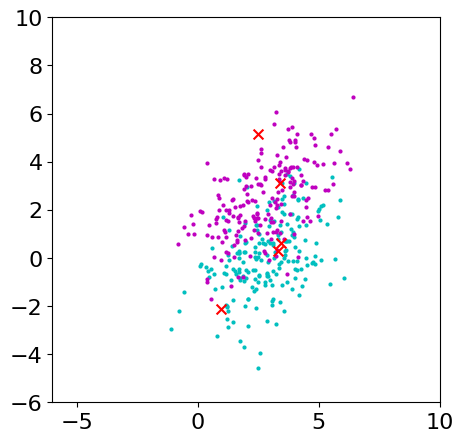

          X         Y  D from m1  D from m2    Class
0  3.301823  0.283820   0.414308   2.236638  Class 1
1  3.442376  0.616599   0.758875   1.934657  Class 1
2  2.506116  5.168230   5.191775   2.713554  Class 2
3  0.946360 -2.116040   2.948740   5.052254  Class 1
4  3.389742  3.098444   3.122860   0.714167  Class 2
          X         Y  D from m1  D from m2    Class
0  3.301823  0.283820   0.239427   1.944470  Class 1
1  3.442376  0.616599   0.449535   1.746629  Class 1
2  2.506116  5.168230   4.435240   2.405711  Class 2
3  0.946360 -2.116040   1.702837   3.270635  Class 1
4  3.389742  3.098444   2.386722   0.429570  Class 2


In [108]:
import pandas as pd


def euclidean_distance(x, mean):

    return np.sqrt(np.sum((x - mean) ** 2))

def mahalanobis_distance(x, mean, cov):

    diff = x - mean
    inv_cov = np.linalg.inv(cov)
    return np.sqrt(np.dot(diff.T, np.dot(inv_cov, diff)))


# data set used
m1 = [3, 0]
m2 = [3, 2.5]

C = [[2, 1], [1, 2]]

# Cholesky decomposition matrix = A;  this is requires for calculting a dataset.
A = np.linalg.cholesky(C)

# Generate data samples and adjust according to covarient matrix and mean.
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A.T + m2

# plot the current data, generated using mean and covariences.
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", label='Class 1', s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="m", label='Class 2', s=4)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

# generate random data points.
def generate_random_points(num_points, mean1, mean2, cov):
    points = []
    for _ in range(num_points):

        if np.random.rand() < 0.5:
            point = np.random.multivariate_normal(mean1, cov)
        else:
            point = np.random.multivariate_normal(mean2, cov)
        points.append(point)
    return np.array(points)

num_points = 5
random_points = generate_random_points(num_points, m1, m2, C)
ax.scatter(random_points[:, 0], random_points[:, 1], c="r", label='Random Points', marker='x', s=50)

plt.show()


# this finction classify points and create a table
def classify_points(random_points, mean1, mean2):
    table = []
    for i, point in enumerate(random_points):

        distance1 = euclidean_distance(point, mean1)
        distance2 = euclidean_distance(point, mean2)

        # Determine the class based on the minimum distance
        if distance1 < distance2:
            point_class = 1
        else:
            point_class = 2


        table.append([point[0], point[1], distance1, distance2, f"Class {point_class}"])

    # Create a DataFrame for the table
    df = pd.DataFrame(table, columns=["X", "Y", "D from m1", "D from m2", "Class"])
    return df


classification_table = classify_points(random_points, m1, m2)
print(classification_table)


# this finction classify points and create a table for mahalonibis
def classify_points_m(random_points, mean1, mean2, C):
    table = []
    for i, point in enumerate(random_points):

        distance1 = mahalanobis_distance(point, mean1, C)
        distance2 = mahalanobis_distance(point, mean2, C)

        # Determine the class based on the minimum distance
        if distance1 < distance2:
            point_class = 1
        else:
            point_class = 2


        table.append([point[0], point[1], distance1, distance2, f"Class {point_class}"])

    # Create a DataFrame for the table
    df = pd.DataFrame(table, columns=["X", "Y", "D from m1", "D from m2", "Class"])
    return df

classification_table_m = classify_points_m(random_points, m1, m2,C)
print(classification_table_m)

